# Testing of Spectral Element Method



In [1]:
# Packages required
import matplotlib.pyplot as plt
import numpy as np
from math import *

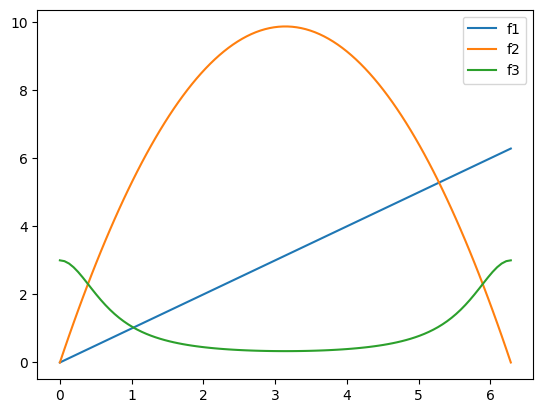

In [21]:
# Test functions
f1 = lambda x: x
f2 = lambda x: x * (2. * pi - x)
f3 = lambda x: 3. / (5. - 4. * np.cos(1. * x))

# Plot the functions in the interval -1 to 1
pts = np.linspace(0, 2*pi, 100)
plt.plot(pts, f1(pts))
plt.plot(pts, f2(pts))
plt.plot(pts, f3(pts))
plt.legend(['f1', 'f2', 'f3']);


[-50. -49. -48. -47. -46. -45. -44. -43. -42. -41. -40. -39. -38. -37.
 -36. -35. -34. -33. -32. -31. -30. -29. -28. -27. -26. -25. -24. -23.
 -22. -21. -20. -19. -18. -17. -16. -15. -14. -13. -12. -11. -10.  -9.
  -8.  -7.  -6.  -5.  -4.  -3.  -2.  -1.   0.   1.   2.   3.   4.   5.
   6.   7.   8.   9.  10.  11.  12.  13.  14.  15.  16.  17.  18.  19.
  20.  21.  22.  23.  24.  25.  26.  27.  28.  29.  30.  31.  32.  33.
  34.  35.  36.  37.  38.  39.  40.  41.  42.  43.  44.  45.  46.  47.
  48.  49.  50.]


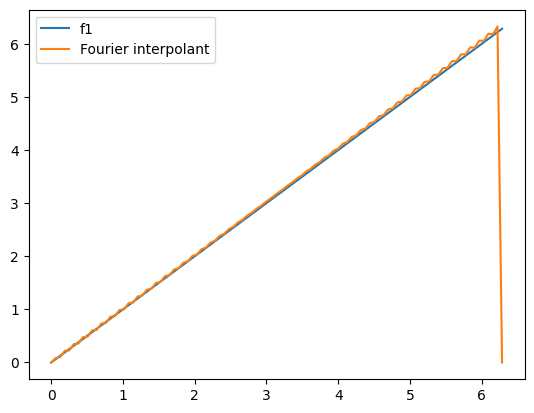

In [39]:
def DiscreteFourierCoefficients(func_evaluation):
    """Direct evaluation of the discrete Fourier coefficients.

    Args:
        func_evaluation (list): Values of the function to be evaluated.

    Returns:
        list: List of the Fourier coefficients.
    """
    i = 1j

    # Number of points
    n = len(func_evaluation)
    k_min = -floor(n / 2)
    k_max = floor(n / 2)

    # Initialize the list of coefficients
    fourier_coefficients = []

    # Loop over the coefficients
    for k in range(k_min, k_max + 1):

        # Initialize the sum
        sum = 0

        # Loop over the points
        for j in range(0, n):

            # Sum the terms
            sum = sum + func_evaluation[j] * np.exp( -2. * pi * i * j * k / n)

        # Append the coefficient
        fourier_coefficients.append(sum / n)

    return fourier_coefficients

def FourierInterpolantFromModes(fourier_coefficients, x):
    """Interpolant of a function from its Fourier coefficients.

    Args:
        fourier_coefficients (list): List of Fourier coefficients.
        x (list): List of points where the interpolant is evaluated.

    Returns:
        list: List of values of the interpolant.
    """
    i = 1j

    # Initialize the list of values
    values = []

    n = len(fourier_coefficients)
    k_min = -floor(n / 2)
    k_max = floor(n / 2)
    K = np.linspace(k_min, k_max, n)

    print(K)

    # Loop over the points
    for x_i in x:

        # Initialize the sum
        sum = (fourier_coefficients[0]  * np.exp(-i * K[0] * x_i) +
                fourier_coefficients[-1] * np.exp( i * K[-1] * x_i )) / 2

        # Loop over the coefficients
        for k_i in range(1, len(K) - 1):
            k = K[k_i]
            fk = fourier_coefficients[k_i]

            # Sum the terms
            sum += fk * np.exp( i * k * x_i)

        # Append the value
        values.append(np.real(sum))

    return values

# Compare the interpolant with the original function
N = 100
nodes = np.linspace(0, 2 * pi, N)

coef = DiscreteFourierCoefficients(f1(nodes))


pts = np.linspace(0, 2*pi, 100)
plt.plot(pts, f1(pts))

plt.plot(pts, FourierInterpolantFromModes(coef, pts))

plt.legend(['f1', 'Fourier interpolant']);

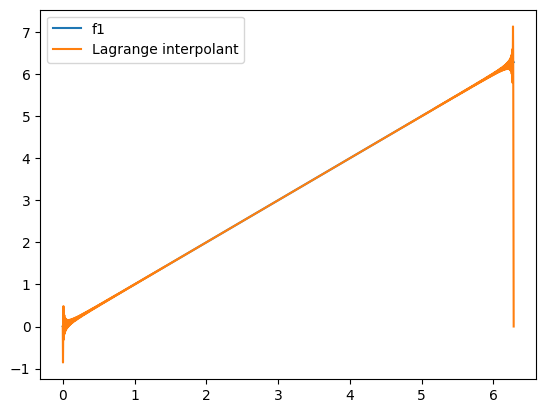

In [42]:
def FourierInterpolantFromNodes(x, nodes, func_evaluation):
    """Interpolant of a function from its nodes.

    Args:
        x (list): List of points where the interpolant is evaluated.
        nodes (list): List of nodes.
        func_evaluation (list): List of values of the function to be evaluated.

    Returns:
        list: List of values of the interpolant.
    """

    # Initialize the list of values
    values = []

    # Number of nodes
    n = len(nodes)

    # Loop over the points
    for x_i in x:

        # Test if the point is a node
        is_node = False
        for j in range(n):
            x_j = nodes[j]
            if abs(x_i - x_j) < 1e-12:
                values.append(func_evaluation[j])
                is_node = True
        if is_node:
            continue

        # Initialize the sum
        sum = 0

        # Loop over the nodes
        for j in range(n):
            x_j = nodes[j]

            t = .5 * (x_i - x_j)

            # Sum the terms
            sum = sum + func_evaluation[j] * sin(n * t) / tan(t) / n

        # Append the value
        values.append(sum)

    return values

# Compare the interpolant with the original function
N = 1000
nodes = []
for j in range(N):
    nodes.append(2 * pi * j / N)

coef = DiscreteFourierCoefficients(f1(nodes))

pts = np.linspace(0, 2*pi, 2000)

plt.plot(pts, f1(pts))
plt.plot(pts, FourierInterpolantFromNodes(pts, nodes, f1(nodes)))

plt.legend(['f1', 'Lagrange interpolant']);